# MyDrive에 git clone 하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/CT-MRI_2way_converter/starGAN')
print('변경된 작업 경로 : ',os.getcwd())

In [ ]:
StarGAN 설치
!git clone https://github.com/Nyounggu/stargan.git
%cd stargan

Cloning into 'stargan'...
remote: Enumerating objects: 189, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 189 (delta 11), reused 1 (delta 0), pack-reused 162
Receiving objects: 100% (189/189), 13.85 MiB | 8.34 MiB/s, done.
Resolving deltas: 100% (90/90), done.
/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan


In [ ]:
#CT, MRI 데이터 전처리 - 사이즈 조정
from PIL import Image
import os

def resize_images_in_folder(folder_path, output_folder_path, target_size):
    # 만약 출력 경로가 존재하지 않으면 생성
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    # 폴더 내의 이미지 파일 목록 가져오기
    image_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    for img_name in image_list:
        img_path = os.path.join(folder_path, img_name)
        # 이미지 열기
        img = Image.open(img_path)
        # 이미지 크기 조정
        img_resized = img.resize((target_size, target_size), Image.ANTIALIAS)

        # 출력 경로에 이미지 저장
        output_img_path = os.path.join(output_folder_path, img_name)
        img_resized.save(output_img_path)

if __name__ == "__main__":
    # CT 데이터셋 폴더 경로
    cttrain_folder_path = "/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/data/DATA0/TRAIN_CT"
    # CT 이미지 크기 조정 후 저장할 폴더 경로
    cttrain_output_folder_path = "/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/data/RaFD/train/CT"

    # CT 데이터셋 폴더 경로
    cttest_folder_path = "/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/data/DATA0/TEST_CT"
    # CT 이미지 크기 조정 후 저장할 폴더 경로
    cttest_output_folder_path = "/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/data/RaFD/test/CT"

    # MRI 데이터셋 폴더 경로
    mritrain_folder_path = "/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/data/DATA0/TRAIN_MRI"
    # MRI 이미지 크기 조정 후 저장할 폴더 경로
    mritrain_output_folder_path = "/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/data/RaFD/train/MRI"

    # MRI 데이터셋 폴더 경로
    mritest_folder_path = "/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/data/DATA0/TEST_MRI"
    # MRI 이미지 크기 조정 후 저장할 폴더 경로
    mritest_output_folder_path = "/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/data/RaFD/test/MRI"

    # 대상 이미지 크기
    target_size = 256

    # CT 이미지 크기 조정
    resize_images_in_folder(cttrain_folder_path, cttrain_output_folder_path, target_size)

    resize_images_in_folder(cttest_folder_path, cttest_output_folder_path, target_size)

    # MRI 이미지 크기 조정
    resize_images_in_folder(mritrain_folder_path, mritrain_output_folder_path, target_size)

    resize_images_in_folder(mritest_folder_path, mritest_output_folder_path, target_size)



<ipython-input-24-149093924d58>:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize((target_size, target_size), Image.ANTIALIAS)


# Start

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/CT-MRI_2way_converter/starGAN')
print('변경된 작업 경로 : ',os.getcwd())

변경된 작업 경로 :  /content/drive/.shortcut-targets-by-id/1arhzGkzN9BhNomv5vjsVxKQRfM6lOeEG/CT-MRI_2way_converter/starGAN


In [ ]:
# Train StarGAN on custom datasets
!python /content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/main.py --mode train --dataset RaFD --rafd_image_dir /content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/data/RaFD --image_size 256 --c_dim 2 --model_save_dir stargan_custom/models --result_dir /content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/stargan_custom/results/train


Namespace(c_dim=2, c2_dim=8, celeba_crop_size=178, rafd_crop_size=256, image_size=256, g_conv_dim=64, d_conv_dim=64, g_repeat_num=6, d_repeat_num=6, lambda_cls=1, lambda_rec=10, lambda_gp=10, dataset='RaFD', batch_size=1, num_iters=10000, num_iters_decay=100000, g_lr=0.0001, d_lr=0.0001, n_critic=5, beta1=0.5, beta2=0.999, resume_iters=None, selected_attrs=['Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Male', 'Young'], test_iters=10000, num_workers=1, mode='train', use_tensorboard=True, celeba_image_dir='data/celeba/images', attr_path='data/celeba/list_attr_celeba.txt', rafd_image_dir='/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/data/RaFD', log_dir='stargan/logs', model_save_dir='stargan_custom/models', sample_dir='/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/stargan/samples', result_dir='/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/stargan_custom/results/train', log_step=10, sample_step=1000, model_save_step=10000, lr_update_step=1000)
Gen

In [ ]:
# Test StarGAN on custom datasets
!python /content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/main.py --mode test --dataset RaFD --rafd_image_dir /content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/data/RaFD --image_size 256 --c_dim 2 --model_save_dir stargan_custom/models --result_dir /content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/stargan_custom/results/test

Namespace(c_dim=2, c2_dim=8, celeba_crop_size=178, rafd_crop_size=256, image_size=256, g_conv_dim=64, d_conv_dim=64, g_repeat_num=6, d_repeat_num=6, lambda_cls=1, lambda_rec=10, lambda_gp=10, dataset='RaFD', batch_size=1, num_iters=10000, num_iters_decay=100000, g_lr=0.0001, d_lr=0.0001, n_critic=5, beta1=0.5, beta2=0.999, resume_iters=None, selected_attrs=['Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Male', 'Young'], test_iters=10000, num_workers=1, mode='test', use_tensorboard=True, celeba_image_dir='data/celeba/images', attr_path='data/celeba/list_attr_celeba.txt', rafd_image_dir='/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/data/RaFD', log_dir='stargan/logs', model_save_dir='stargan_custom/models', sample_dir='/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/stargan/samples', result_dir='/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/stargan_custom/results/test', log_step=10, sample_step=1000, model_save_step=10000, lr_update_step=1000)
Gener

In [ ]:
!python /content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/main.py --help


usage: main.py [-h] [--mode {train,test}]

Description of your program

options:
  -h, --help           show this help message and exit
  --mode {train,test}  Mode: train or test




---



## PSNR과 SSIM은 이미지 유사성을 측정하는 데 사용되는 지표입니다.

- PSNR은 이미지 간의 픽셀 값 차이를 측정하며, 값이 높을수록 이미지가 더 유사함을 의미합니다. 일반적으로 30 이상의 값은 높은 유사성을 나타냅니다. 따라서 이미지가 상당히 유사하다는 것을 시사합니다.
  
- SSIM은 구조적 유사성 지표로, 밝기, 대비, 구조 등을 고려하여 이미지 간의 유사성을 측정합니다. 값이 1에 가까울수록 이미지가 유사함을 나타내며, 해당 결과는 상대적으로 중간 수준의 유사성을 보여줍니다.



# CT2MRI 평가


In [ ]:
import cv2

# 이미지 파일 불러오기
image1 = cv2.imread('/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/data/RaFD/test/MRI/000__103.500_(254, 169)_[56, 55, 309, 223]_MR2.16.840.1.114493.1.4.255.3.20220602161634003.jpg')
image2 = cv2.imread('/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/stargan_custom/results/test/1-images.jpg')

In [ ]:
import numpy as np
from PIL import Image

# 이미지를 numpy 배열로 읽어오기
img2_array = np.array(image2)

# 맨 오른쪽 256 픽셀 선택
selected_region = img2_array[:, -256:]

# 선택한 영역을 Image 객체로 변환
resized_img2 = Image.fromarray(selected_region)

# 선택한 영역을 원하는 크기로 리사이즈
resized_img2 = resized_img2.resize((256, 256), Image.ANTIALIAS)


<ipython-input-31-e7c5840f07c1>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img2 = resized_img2.resize((256, 256), Image.ANTIALIAS)


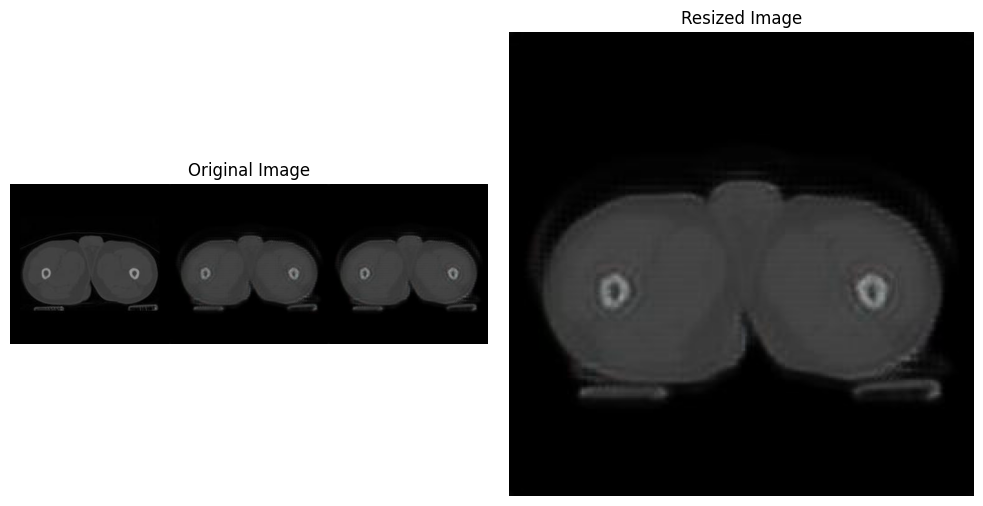

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image2)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(resized_img2)
axes[1].set_title('Resized Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# CT -> MRI

import cv2
from skimage.metrics import structural_similarity as compare_ssim
import numpy as np

# 이미지를 NumPy 배열로 변환합니다.
image1_np = np.array(image1)
resized_img2_np = np.array(resized_img2)

def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# PSNR 계산
psnr_value = calculate_psnr(resized_img2, image1)

# SSIM 계산
ssim_value, _ = compare_ssim(resized_img2_np, image1_np, win_size=3, full=True)

print(f"PSNR: {psnr_value:.2f}")
print(f"SSIM: {ssim_value:.2f}")


PSNR: 32.18
SSIM: 0.75


#MRI2CT 평가

In [ ]:
# 이미지 파일 불러오기
image1 = cv2.imread('/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/data/RaFD/test/CT/000__103.500_(254, 169)_[56, 55, 309, 223]_CT2.16.840.1.114493.1.4.255.6.20230601114010543.jpg')
image2 = cv2.imread('/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/stargan_custom/results/test/631-images.jpg')

In [ ]:
import numpy as np
from PIL import Image

# 이미지를 numpy 배열로 읽어오기
img2_array = np.array(image2)

# 이미지의 중앙 256 픽셀 선택
center_x = img2_array.shape[1] // 2  # 이미지의 가로 중심
selected_region = img2_array[:, center_x - 128 : center_x + 128]  # 중앙 128 픽셀 선택

# 선택한 영역을 Image 객체로 변환
resized_img2 = Image.fromarray(selected_region)

# 선택한 영역을 원하는 크기로 리사이즈
resized_img2 = resized_img2.resize((256, 256), Image.ANTIALIAS)



<ipython-input-50-162575b4b266>:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img2 = resized_img2.resize((256, 256), Image.ANTIALIAS)


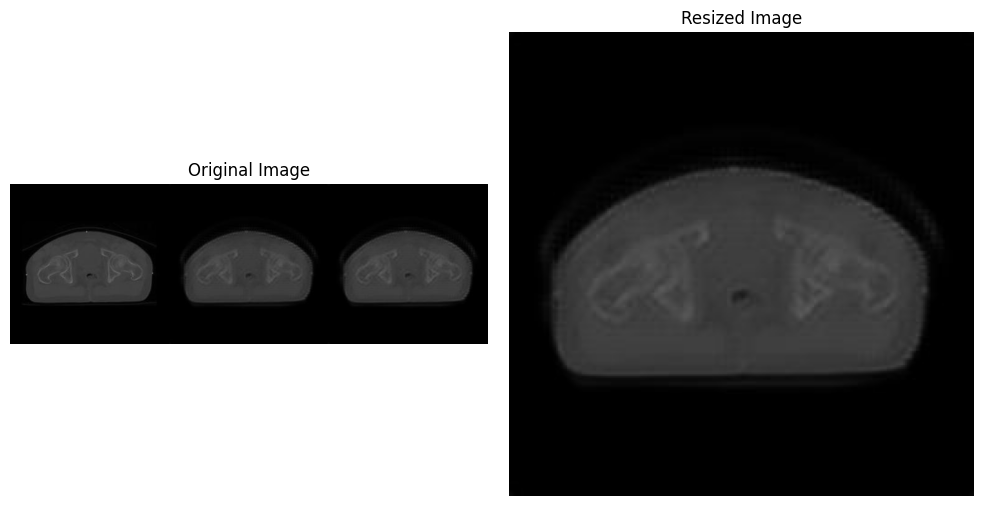

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image2)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(resized_img2)
axes[1].set_title('Resized Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# MRI -> CT

import cv2
from skimage.metrics import structural_similarity as compare_ssim
import numpy as np

# 이미지를 NumPy 배열로 변환합니다.
image1_np = np.array(image1)
resized_img2_np = np.array(resized_img2)

def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# PSNR 계산
psnr_value = calculate_psnr(resized_img2, image1)

# SSIM 계산
ssim_value, _ = compare_ssim(resized_img2_np, image1_np, win_size=3, full=True)

print(f"PSNR: {psnr_value:.2f}")
print(f"SSIM: {ssim_value:.2f}")


PSNR: 34.77
SSIM: 0.84


#데이터 시각화 (t-sne)

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

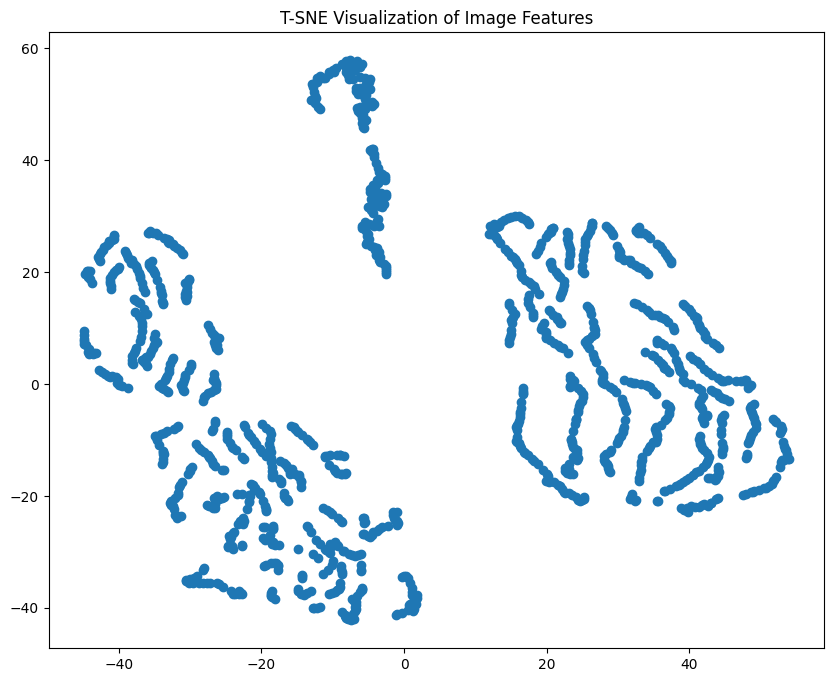

In [ ]:
# 이미지를 불러오고 전처리하는 함수
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = transform(image)
    image = image.unsqueeze(0)  # 배치 차원 추가
    return image

# 특징 벡터를 추출하는 함수
def extract_features(model, image):
    with torch.no_grad():
        model.eval()
        features = model(image)
    return features.flatten().numpy()

# 이미지 폴더에서 이미지 리스트를 가져오는 함수
def get_image_list(folder_path):
    image_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image_list.append(image_path)
    return image_list

# T-SNE를 사용하여 시각화하는 함수
def visualize_tsne(features):
    tsne = TSNE(n_components=2, random_state=42)
    embedded_features = tsne.fit_transform(features)

    plt.figure(figsize=(10, 8))
    plt.scatter(embedded_features[:, 0], embedded_features[:, 1])
    plt.title('T-SNE Visualization of Image Features')
    plt.show()

# 이미지 폴더 경로
image_folder_path = '/content/drive/MyDrive/CT-MRI_2way_converter/starGAN/stargan/stargan_custom/results/test'

# ResNet-18 모델 불러오기
model = models.resnet18(pretrained=True)
model = nn.Sequential(*list(model.children())[:-1])  # 마지막 FC 레이어 제거
model.eval()

# 이미지 리스트 및 특징 벡터 추출
image_list = get_image_list(image_folder_path)
feature_vectors = []

for image_path in image_list:
    image = preprocess_image(image_path)
    feature_vector = extract_features(model, image)
    feature_vectors.append(feature_vector)

# T-SNE 시각화
feature_vectors = np.array(feature_vectors)
visualize_tsne(feature_vectors)

